In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.datasets import mnist

In [4]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
X_test.shape,Y_test.shape

((10000, 28, 28), (10000,))

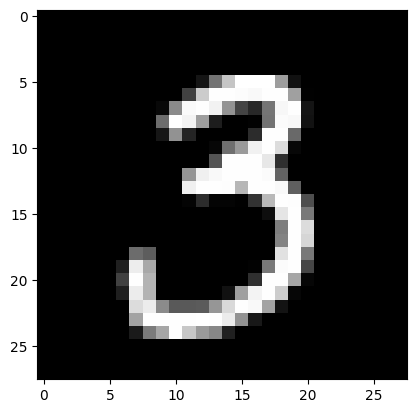

In [10]:
plt.imshow(X_test[90],cmap="gray")
plt.show()

In [11]:
Y_test[90]

3

In [12]:
X=X_test.reshape(-1,28*28)
Y=Y_test

In [13]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
X_=sc.fit_transform(X)

In [17]:
X_.shape

(10000, 784)

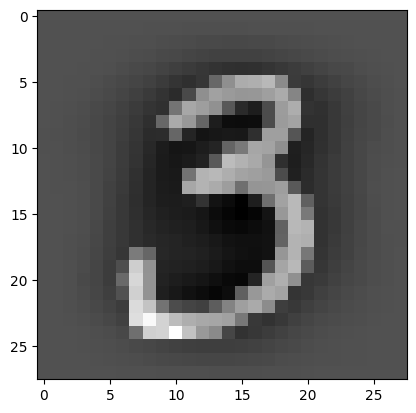

In [21]:
plt.imshow(X_[90].reshape(28,28),cmap='gray')
plt.show()

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca=PCA(n_components=2)

In [25]:
Z_pca=pca.fit_transform(X_)

In [27]:
Z_pca.shape

(10000, 2)

In [28]:
pca.explained_variance_

array([41.39893397, 28.35105687])

In [29]:
covar=np.dot(X_.T,X_)

In [30]:
covar.shape

(784, 784)

In [31]:
from numpy.linalg import svd

In [32]:
U,S,V=svd(covar)

In [34]:
U.shape

(784, 784)

In [35]:
Ured=U[:,:2]

In [36]:
Ured.shape

(784, 2)

In [37]:
Z=np.dot(X_,Ured)

In [38]:
Z.shape

(10000, 2)

In [39]:
print(Z)

[[  5.45831116  -6.41400668]
 [ -2.80443233   8.02885014]
 [  7.41124146   3.86404387]
 ...
 [  5.00435204  -1.15364641]
 [  1.42085442   4.42308066]
 [-13.14268302   4.26280299]]


In [41]:
new_dataset=np.hstack((Z,Y.reshape(-1,1)))

In [44]:
dataframe=pd.DataFrame(new_dataset,columns=["PC1","PC2","Label"])

In [45]:
dataframe.head()

,PC1,PC2,Label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


In [46]:
import seaborn as sns

<Figure size 1500x1500 with 0 Axes>

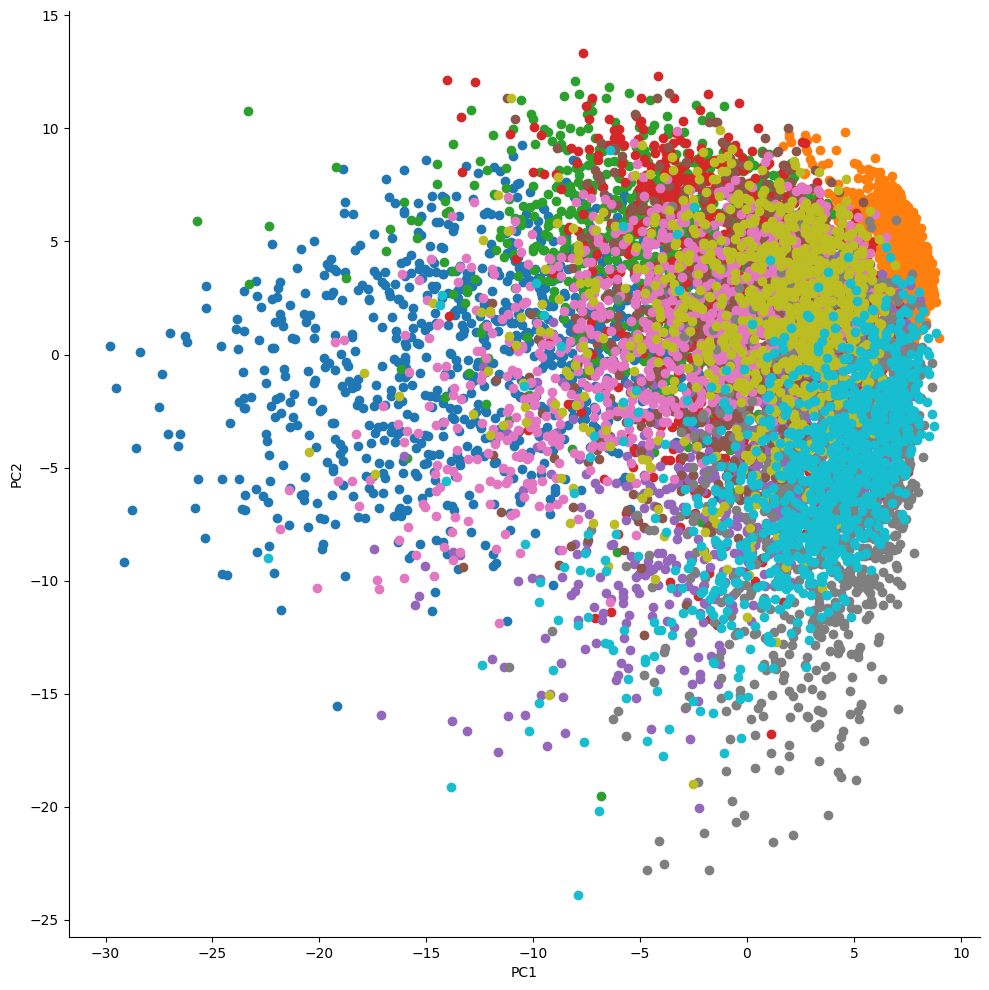

In [49]:
plt.figure(figsize=(15,15))
fg=sns.FacetGrid(dataframe,hue="Label",height=10)
fg.map(plt.scatter,"PC1","PC2")
plt.show()